## PE File Malware Detection in Python


In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pck
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
#Loading dataset from training
data = pd.read_csv('copy_dataset_malwares_6.csv', sep=',')

#The target is Malware Column {0=Benign, 1=Malware}
X = data.drop(['Name','Malware'], axis=1)
y = data['Malware']

In [3]:
data.head()

,Name,e_magic,e_lfanew,Machine,NumberOfSections,TimeDateStamp,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,...,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,NumberOfRvaAndSizes,Malware
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,248,34404,6,1236512358,240,34,523,8,...,295281,274432,2,32832,524288,8192,1048576,4096,16,1
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,240,332,5,1365109591,224,258,267,9,...,0,442368,2,33088,1048576,4096,1048576,4096,16,1
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,256,332,6,1438777028,224,14,267,6,...,0,49152,2,0,1048576,4096,1048576,69632,528,1
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,128,332,7,1354629311,224,783,267,2,...,14174816,1032192,2,32768,2097152,4096,1048576,4096,16,1
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,128,332,7,1386631250,224,783,267,2,...,0,110592,2,0,2097152,4096,1048576,4096,16,1


In [4]:
data.columns

Index(['Name', 'e_magic', 'e_lfanew', 'Machine', 'NumberOfSections',
       'TimeDateStamp', 'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'NumberOfRvaAndSizes', 'Malware'],
      dtype='object')

In [5]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

X_train.head()

,e_magic,e_lfanew,Machine,NumberOfSections,TimeDateStamp,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,...,SizeOfHeaders,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,NumberOfRvaAndSizes
17996,23117,128,34404,2,1375747120,240,34,523,11,0,...,512,56317,57344,3,34144,4194304,16384,1048576,8192,16
15684,23117,128,332,3,1377174991,224,8450,267,11,0,...,512,53909,32768,3,34112,1048576,4096,1048576,4096,16
7091,23117,256,332,3,708992537,224,33167,267,2,25,...,4096,1215280277,1175552,2,0,1048576,16384,1048576,4096,16
5374,23117,200,332,3,1396988441,224,271,267,6,0,...,4096,106294,73728,2,0,1048576,4096,1048576,4096,16
174,23117,256,332,2,1299829942,224,33166,267,15,25,...,1024,34535,69632,2,0,1048576,16384,1048576,4096,16


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=0, oob_score=True, max_depth=16, max_features='sqrt')
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)

# Decision Tree Classifier
model_dt = DecisionTreeClassifier(max_depth=16, max_features='sqrt', random_state=0)
model_dt.fit(X_train_scaled, y_train)
y_pred_dt = model_dt.predict(X_test_scaled)

# AdaBoost Classifier (without specifying base_estimator)
model_ada = AdaBoostClassifier(n_estimators=100, random_state=0)
model_ada.fit(X_train_scaled, y_train)
y_pred_ada = model_ada.predict(X_test_scaled)

# Extra Trees Classifier
model_et = ExtraTreesClassifier(n_estimators=100, max_depth=16, max_features='sqrt', random_state=0)
model_et.fit(X_train_scaled, y_train)
y_pred_et = model_et.predict(X_test_scaled)

# Gradient Boosting Classifier
model_gbm = GradientBoostingClassifier(n_estimators=100, max_depth=16, max_features='sqrt', random_state=0)
model_gbm.fit(X_train_scaled, y_train)
y_pred_gbm = model_gbm.predict(X_test_scaled)

# List of models
models = [model_rf, model_dt, model_ada, model_et, model_gbm]
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees", "Gradient Boosting"]

# Training and evaluating each model
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_pred, y_test))


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       982
           1       1.00      0.99      0.99      2941

    accuracy                           0.99      3923
   macro avg       0.99      0.99      0.99      3923
weighted avg       0.99      0.99      0.99      3923


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       989
           1       0.99      0.99      0.99      2934

    accuracy                           0.99      3923
   macro avg       0.98      0.99      0.98      3923
weighted avg       0.99      0.99      0.99      3923


Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       996
           1       0.99      0.99      0.99      2927

    accuracy                           0.99      3923
   macr

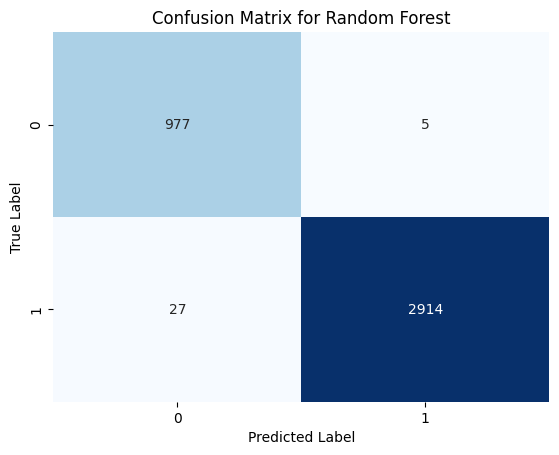

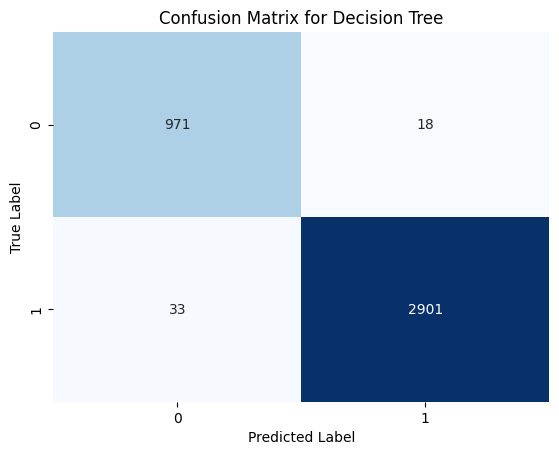

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


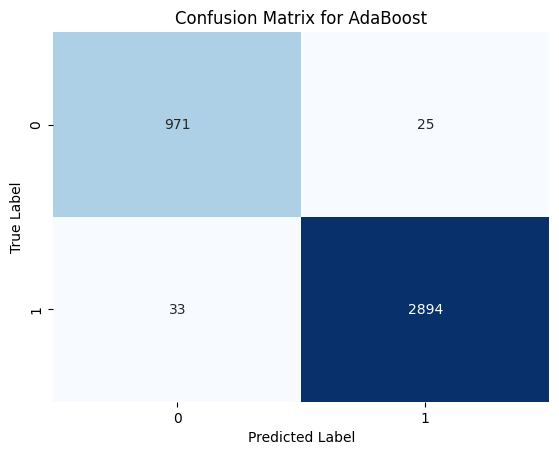

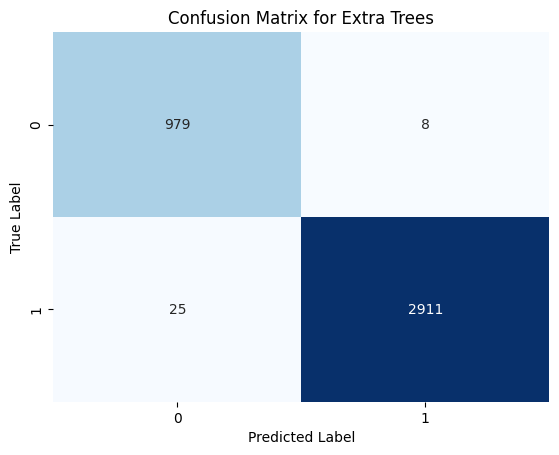

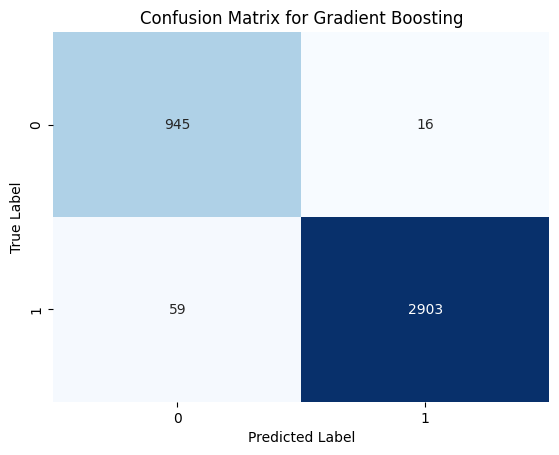

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define models
models = [
    RandomForestClassifier(n_estimators=100, random_state=0, oob_score=True, max_depth=16, max_features='sqrt'),
    DecisionTreeClassifier(max_depth=16, max_features='sqrt', random_state=0),
    AdaBoostClassifier(n_estimators=100, random_state=0),
    GradientBoostingClassifier(n_estimators=100, max_depth=16, max_features='sqrt', random_state=0),
    ExtraTreesClassifier(n_estimators=100, max_depth=16, max_features='sqrt', random_state=0),
]

# Model names
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees", "Gradient Boosting"]

# Train, predict, and evaluate each model
for model, model_name in zip(models, model_names):
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test_scaled)
    
    # Plot confusion matrix
    sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [8]:
from sklearn.pipeline import Pipeline
import joblib

# Define the pipeline without PCA
pipe_rf = Pipeline([('scale', scaler), ('clf', model_rf)])
pipe_dt = Pipeline([('scale', scaler), ('clf', model_dt)])
pipe_ada = Pipeline([('scale', scaler), ('clf', model_ada)])
pipe_et = Pipeline([('scale', scaler), ('clf', model_et)])
pipe_gbm = Pipeline([('scale', scaler), ('clf', model_gbm)])

# List of pipelines
pipelines = [pipe_rf, pipe_dt, pipe_ada, pipe_et, pipe_gbm]
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees", "Gradient Boosting"]

# Train and evaluate each pipeline
for pipeline, model_name in zip(pipelines, model_names):
    # Train the pipeline
    pipeline.fit(X_train, y_train)
    
    # Save the pipeline
    joblib.dump(pipeline, f'{model_name}_pipeline.pkl')


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


C:\Users\hp\AppData\Local\Temp\ipykernel_7896\1073155054.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')


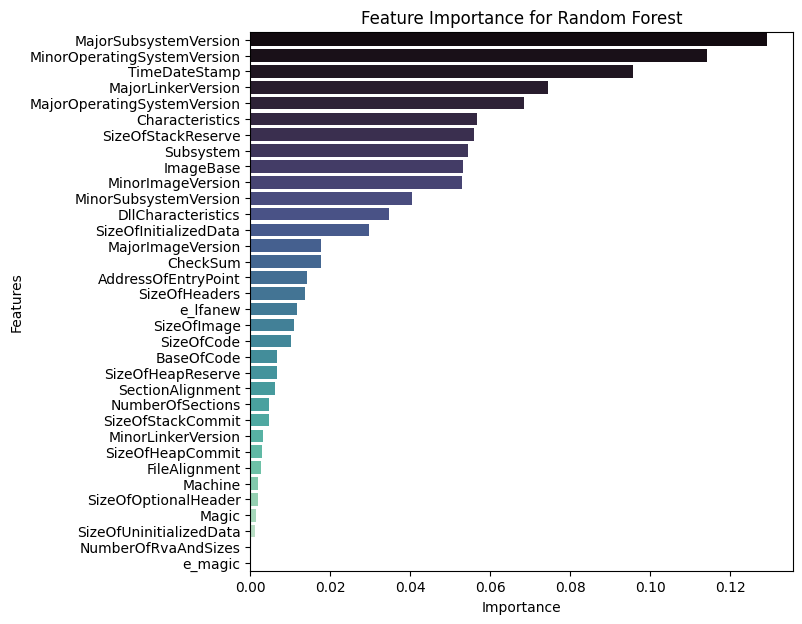

C:\Users\hp\AppData\Local\Temp\ipykernel_7896\1073155054.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')


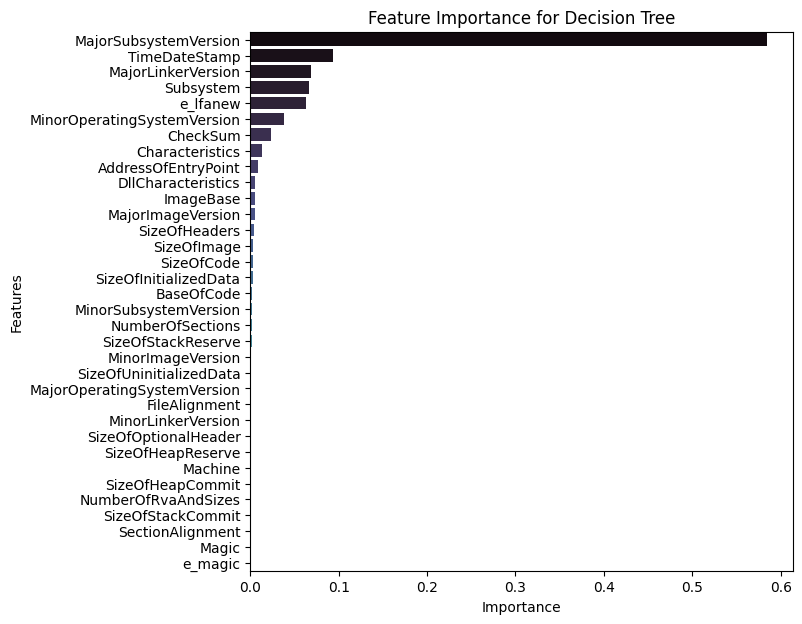

C:\Users\hp\AppData\Local\Temp\ipykernel_7896\1073155054.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')


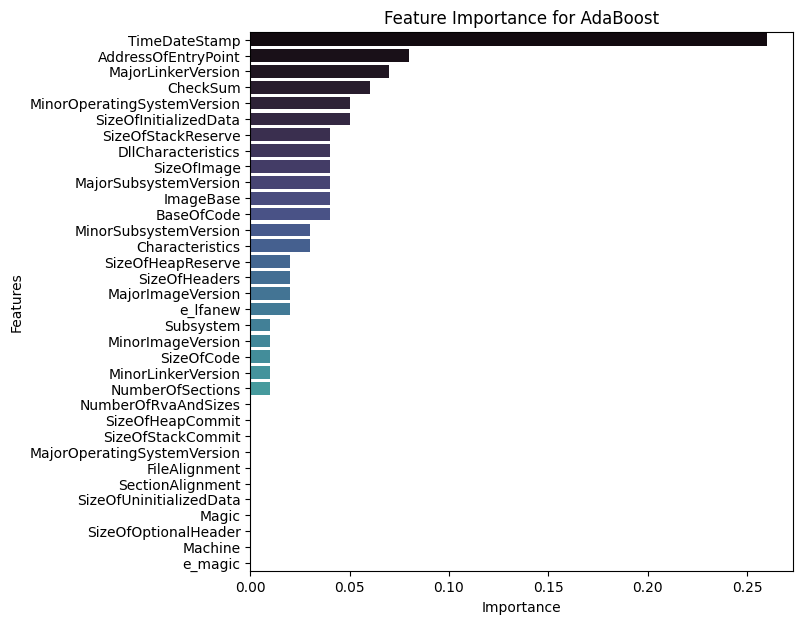

C:\Users\hp\AppData\Local\Temp\ipykernel_7896\1073155054.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')


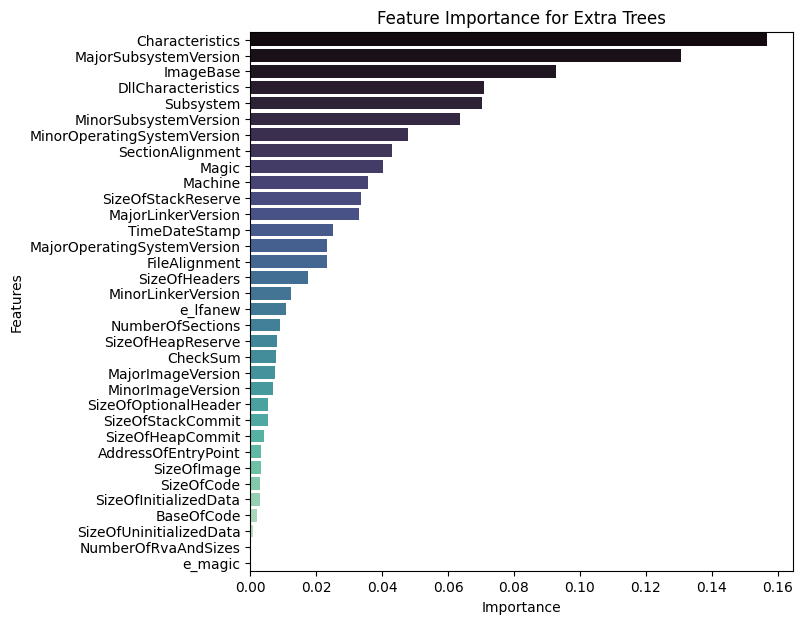

C:\Users\hp\AppData\Local\Temp\ipykernel_7896\1073155054.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')


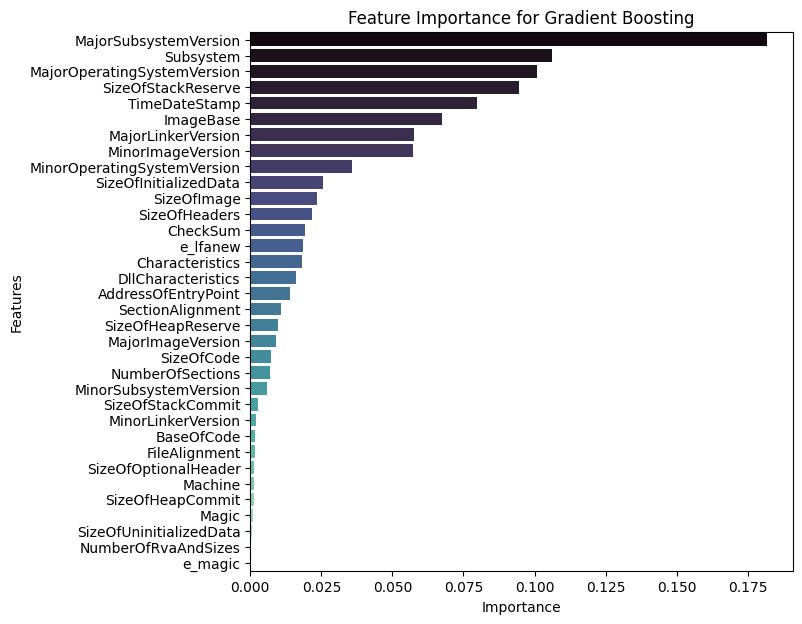

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define models and their corresponding names
models = [model_rf, model_dt, model_ada, model_et, model_gbm]
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees", "Gradient Boosting"]

# Plot feature importance for each model
for model, model_name in zip(models, model_names):
    # Get feature importances
    importance = model.feature_importances_
    
    # Create a dictionary mapping each feature to its importance value
    importance_dict = {X.columns[i]: importance[i] for i in range(len(importance))}
    
    # Sort the dictionary based on importance values
    sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
    
    # Plot the sorted feature importances using a bar plot
    plt.figure(figsize=(7, 7))
    sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')
    plt.title(f'Feature Importance for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

Feature Importance for Random Forest:
e_magic: 0.00%
NumberOfRvaAndSizes: 0.00%
SizeOfUninitializedData: 0.11%
Magic: 0.14%
SizeOfOptionalHeader: 0.18%
Machine: 0.19%
FileAlignment: 0.27%
SizeOfHeapCommit: 0.30%
MinorLinkerVersion: 0.33%
SizeOfStackCommit: 0.47%
NumberOfSections: 0.47%
SectionAlignment: 0.62%
SizeOfHeapReserve: 0.66%
BaseOfCode: 0.66%
SizeOfCode: 1.01%
SizeOfImage: 1.09%
e_lfanew: 1.16%
SizeOfHeaders: 1.37%
AddressOfEntryPoint: 1.43%
CheckSum: 1.76%
MajorImageVersion: 1.77%
SizeOfInitializedData: 2.97%
DllCharacteristics: 3.47%
MinorSubsystemVersion: 4.03%
MinorImageVersion: 5.29%
ImageBase: 5.32%
Subsystem: 5.44%
SizeOfStackReserve: 5.59%
Characteristics: 5.68%
MajorOperatingSystemVersion: 6.85%
MajorLinkerVersion: 7.45%
TimeDateStamp: 9.56%
MinorOperatingSystemVersion: 11.43%
MajorSubsystemVersion: 12.92%




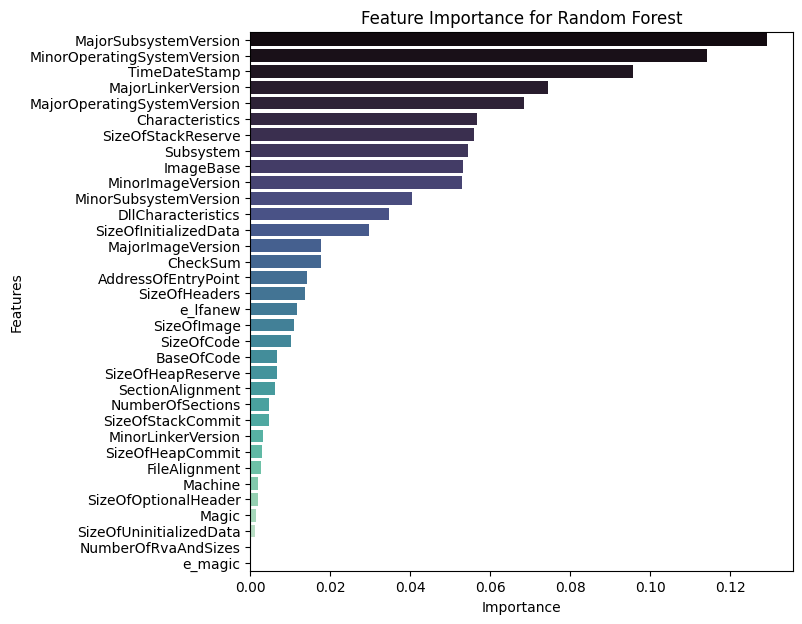

Feature Importance for Decision Tree:
e_magic: 0.00%
Magic: 0.00%
SectionAlignment: 0.00%
SizeOfStackCommit: 0.00%
NumberOfRvaAndSizes: 0.00%
SizeOfHeapCommit: 0.00%
Machine: 0.00%
SizeOfHeapReserve: 0.01%
SizeOfOptionalHeader: 0.01%
MinorLinkerVersion: 0.03%
FileAlignment: 0.06%
MajorOperatingSystemVersion: 0.08%
SizeOfUninitializedData: 0.09%
MinorImageVersion: 0.11%
SizeOfStackReserve: 0.17%
NumberOfSections: 0.22%
MinorSubsystemVersion: 0.22%
BaseOfCode: 0.23%
SizeOfInitializedData: 0.26%
SizeOfCode: 0.27%
SizeOfImage: 0.28%
SizeOfHeaders: 0.40%
MajorImageVersion: 0.48%
ImageBase: 0.51%
DllCharacteristics: 0.55%
AddressOfEntryPoint: 0.83%
Characteristics: 1.35%
CheckSum: 2.32%
MinorOperatingSystemVersion: 3.84%
e_lfanew: 6.30%
Subsystem: 6.64%
MajorLinkerVersion: 6.91%
TimeDateStamp: 9.36%
MajorSubsystemVersion: 58.45%




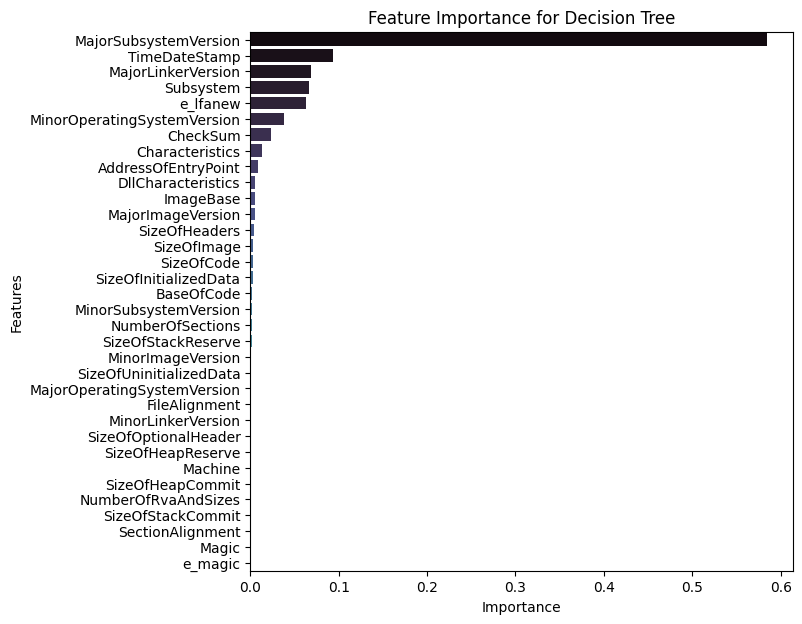

Feature Importance for AdaBoost:
e_magic: 0.00%
Machine: 0.00%
SizeOfOptionalHeader: 0.00%
Magic: 0.00%
SizeOfUninitializedData: 0.00%
SectionAlignment: 0.00%
FileAlignment: 0.00%
MajorOperatingSystemVersion: 0.00%
SizeOfStackCommit: 0.00%
SizeOfHeapCommit: 0.00%
NumberOfRvaAndSizes: 0.00%
NumberOfSections: 1.00%
MinorLinkerVersion: 1.00%
SizeOfCode: 1.00%
MinorImageVersion: 1.00%
Subsystem: 1.00%
e_lfanew: 2.00%
MajorImageVersion: 2.00%
SizeOfHeaders: 2.00%
SizeOfHeapReserve: 2.00%
Characteristics: 3.00%
MinorSubsystemVersion: 3.00%
BaseOfCode: 4.00%
ImageBase: 4.00%
MajorSubsystemVersion: 4.00%
SizeOfImage: 4.00%
DllCharacteristics: 4.00%
SizeOfStackReserve: 4.00%
SizeOfInitializedData: 5.00%
MinorOperatingSystemVersion: 5.00%
CheckSum: 6.00%
MajorLinkerVersion: 7.00%
AddressOfEntryPoint: 8.00%
TimeDateStamp: 26.00%




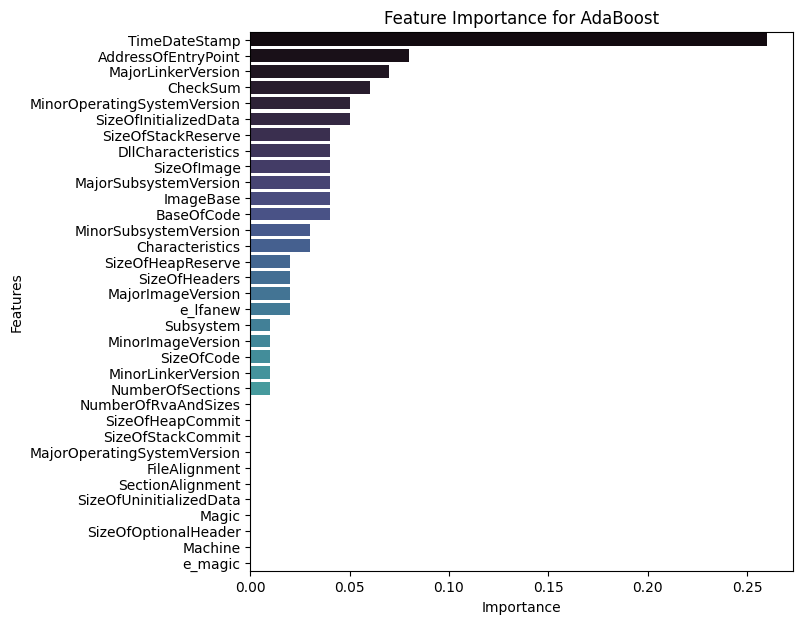

Feature Importance for Extra Trees:
e_magic: 0.00%
NumberOfRvaAndSizes: 0.01%
SizeOfUninitializedData: 0.08%
BaseOfCode: 0.20%
SizeOfInitializedData: 0.28%
SizeOfCode: 0.30%
SizeOfImage: 0.33%
AddressOfEntryPoint: 0.34%
SizeOfHeapCommit: 0.41%
SizeOfStackCommit: 0.54%
SizeOfOptionalHeader: 0.54%
MinorImageVersion: 0.69%
MajorImageVersion: 0.75%
CheckSum: 0.79%
SizeOfHeapReserve: 0.81%
NumberOfSections: 0.91%
e_lfanew: 1.08%
MinorLinkerVersion: 1.23%
SizeOfHeaders: 1.74%
FileAlignment: 2.32%
MajorOperatingSystemVersion: 2.33%
TimeDateStamp: 2.50%
MajorLinkerVersion: 3.31%
SizeOfStackReserve: 3.34%
Machine: 3.56%
Magic: 4.02%
SectionAlignment: 4.29%
MinorOperatingSystemVersion: 4.78%
MinorSubsystemVersion: 6.37%
Subsystem: 7.03%
DllCharacteristics: 7.10%
ImageBase: 9.28%
MajorSubsystemVersion: 13.07%
Characteristics: 15.67%




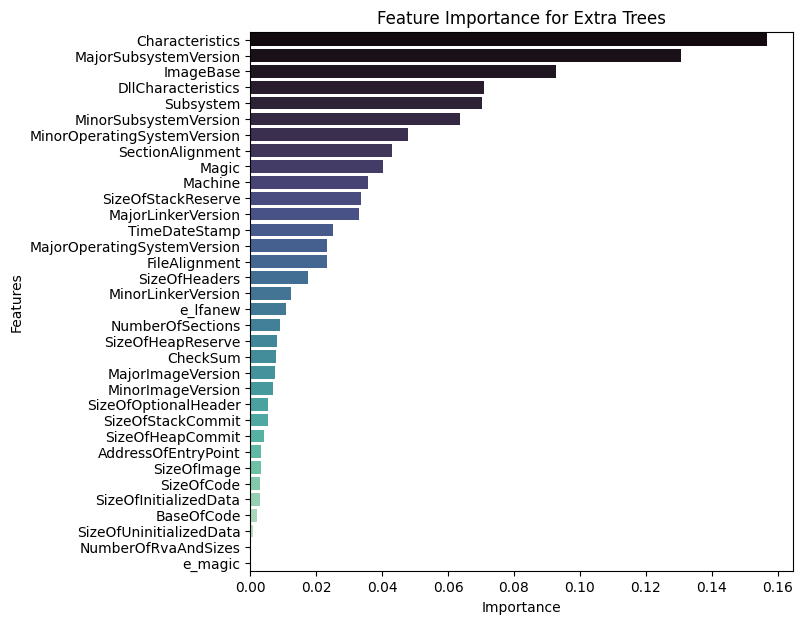

Feature Importance for Gradient Boosting:
e_magic: 0.00%
NumberOfRvaAndSizes: 0.00%
SizeOfUninitializedData: 0.06%
Magic: 0.09%
SizeOfHeapCommit: 0.12%
Machine: 0.13%
SizeOfOptionalHeader: 0.15%
FileAlignment: 0.15%
BaseOfCode: 0.15%
MinorLinkerVersion: 0.20%
SizeOfStackCommit: 0.27%
MinorSubsystemVersion: 0.58%
NumberOfSections: 0.69%
SizeOfCode: 0.74%
MajorImageVersion: 0.90%
SizeOfHeapReserve: 0.96%
SectionAlignment: 1.08%
AddressOfEntryPoint: 1.41%
DllCharacteristics: 1.60%
Characteristics: 1.81%
e_lfanew: 1.84%
CheckSum: 1.91%
SizeOfHeaders: 2.18%
SizeOfImage: 2.35%
SizeOfInitializedData: 2.54%
MinorOperatingSystemVersion: 3.58%
MinorImageVersion: 5.71%
MajorLinkerVersion: 5.75%
ImageBase: 6.76%
TimeDateStamp: 7.99%
SizeOfStackReserve: 9.44%
MajorOperatingSystemVersion: 10.08%
Subsystem: 10.62%
MajorSubsystemVersion: 18.18%




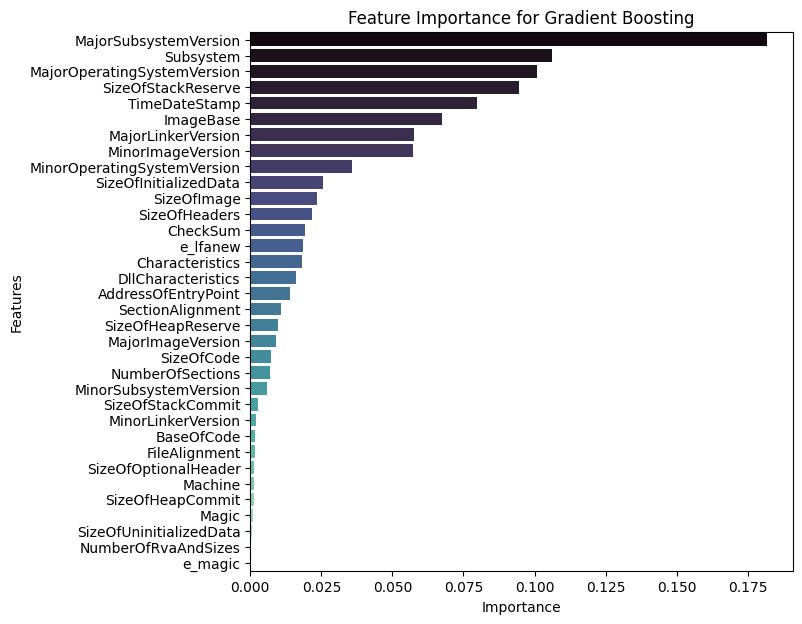

In [10]:
# Define models and their corresponding names
models = [model_rf, model_dt, model_ada, model_et, model_gbm]
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees", "Gradient Boosting"]

# Plot feature importance for each model
for model, model_name in zip(models, model_names):
    # Get feature importances
    importance = model.feature_importances_
    
    # Create a dictionary mapping each feature to its importance value
    importance_dict = {X.columns[i]: importance[i] for i in range(len(importance))}
    
    # Sort the dictionary based on importance values
    sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
    
    # Convert importance values to percentages
    total_importance = sum(importance)
    importance_percentages = {k: (v / total_importance) * 100 for k, v in sorted_dict.items()}
    
    # Print feature importance values in text format
    print(f"Feature Importance for {model_name}:")
    for feature, importance_percentage in importance_percentages.items():
        print(f"{feature}: {importance_percentage:.2f}%")
    print("\n")
    
    # Plot the sorted feature importances using a bar plot
    plt.figure(figsize=(7, 7))
    sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], hue=list(sorted_dict.keys())[::-1], palette='mako', legend=False)
    plt.title(f'Feature Importance for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()


In [11]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('copy_dataset_test_6.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# List of model names
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees"]

# List to store predictions for each model
predictions = []

# Load and predict using each trained model
for model_name in model_names:
    # Load the pipeline
    pipeline = joblib.load(f'{model_name}_pipeline.pkl')
    
    # Transform the testing data
    X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)
    
    # Predict probabilities
    y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_scaled)
    
    # Store the predictions
    predictions.append(pd.DataFrame(y_testing_pred))

# Concatenate predictions with the test data
result = pd.concat([test['Name']] + predictions, axis=1)

# Display the result
print(result)

                                                 Name         0         1  \
0                                  Skype-8.10.0.9.exe  0.973846  0.026154   
1                                 vlc-3.0.2-win64.exe  0.835289  0.164711   
2                                       stinger32.exe  0.627512  0.372488   
3                                SpotifyFullSetup.exe  0.800303  0.199697   
4                                    uftp_english.exe  0.759664  0.240336   
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...  0.091027  0.908973   
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...  0.637044  0.362956   
7                                   reverse_shell.exe  0.430032  0.569968   
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...  0.392181  0.607819   
9                             ScratchInstaller1.4.exe  0.058165  0.941835   
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...  0.367611  0.632389   
11  3334686141a400bb522824fa6f7faf30614372fe11837a...  0.001834  0.998166   

In [12]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('copy_dataset_test_6.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# Load the Random Forest pipeline
pipeline = joblib.load('Random Forest_pipeline.pkl')

# Transform the testing data using only the scaler
X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)

# Predict probabilities using the Random Forest model
y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_scaled)

# Create a DataFrame with the predictions and the executable file names
predictions_df = pd.DataFrame(y_testing_pred, columns=pipeline.named_steps['clf'].classes_)
predictions_df['Name'] = test['Name']

# Reorder columns to have 'Name' as the first column
predictions_df = predictions_df[['Name'] + list(predictions_df.columns[:-1])]

# Display the predictions
print(predictions_df)

                                                 Name         0         1
0                                  Skype-8.10.0.9.exe  0.973846  0.026154
1                                 vlc-3.0.2-win64.exe  0.835289  0.164711
2                                       stinger32.exe  0.627512  0.372488
3                                SpotifyFullSetup.exe  0.800303  0.199697
4                                    uftp_english.exe  0.759664  0.240336
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...  0.091027  0.908973
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...  0.637044  0.362956
7                                   reverse_shell.exe  0.430032  0.569968
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...  0.392181  0.607819
9                             ScratchInstaller1.4.exe  0.058165  0.941835
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...  0.367611  0.632389
11  3334686141a400bb522824fa6f7faf30614372fe11837a...  0.001834  0.998166
12  3ec4cb928846f8298e5a13b3e96bfc2a70

In [19]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('copy_dataset_test_6.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# Load the Random Forest pipeline
pipeline = joblib.load('Gradient Boosting_pipeline.pkl')

# Transform the testing data using only the scaler
X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)

# Predict probabilities using the Random Forest model
y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_scaled)

# Create a DataFrame with the predictions and the executable file names
predictions_df = pd.DataFrame(y_testing_pred, columns=pipeline.named_steps['clf'].classes_)
predictions_df['Name'] = test['Name']

# Reorder columns to have 'Name' as the first column
predictions_df = predictions_df[['Name'] + list(predictions_df.columns[:-1])]

# Display the predictions
print(predictions_df)

                                                 Name         0         1
0                                  Skype-8.10.0.9.exe  0.999937  0.000063
1                                 vlc-3.0.2-win64.exe  0.999922  0.000078
2                                       stinger32.exe  0.824243  0.175757
3                                SpotifyFullSetup.exe  0.999618  0.000382
4                                    uftp_english.exe  0.996042  0.003958
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...  0.000076  0.999924
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...  0.991062  0.008938
7                                   reverse_shell.exe  0.029961  0.970039
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...  0.112020  0.887980
9                             ScratchInstaller1.4.exe  0.989804  0.010196
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...  0.007931  0.992069
11  3334686141a400bb522824fa6f7faf30614372fe11837a...  0.000035  0.999965
12  3ec4cb928846f8298e5a13b3e96bfc2a70

In [36]:
import pefile

def extract_pe_attributes(exe_path):
    # Open the EXE file
    pe = pefile.PE(exe_path)
    
    # Extract PE attributes
    pe_attributes = {
        'e_magic': pe.DOS_HEADER.e_magic,
        'e_lfanew': pe.DOS_HEADER.e_lfanew,
        'Machine': pe.FILE_HEADER.Machine,
        'NumberOfSections': pe.FILE_HEADER.NumberOfSections,
        'TimeDateStamp': pe.FILE_HEADER.TimeDateStamp,
        'SizeOfOptionalHeader': pe.FILE_HEADER.SizeOfOptionalHeader,
        'Characteristics': pe.FILE_HEADER.Characteristics,
        'Magic': pe.OPTIONAL_HEADER.Magic,
        'MajorLinkerVersion': pe.OPTIONAL_HEADER.MajorLinkerVersion,
        'MinorLinkerVersion': pe.OPTIONAL_HEADER.MinorLinkerVersion,
        'SizeOfCode': pe.OPTIONAL_HEADER.SizeOfCode,
        'SizeOfInitializedData': pe.OPTIONAL_HEADER.SizeOfInitializedData,
        'SizeOfUninitializedData': pe.OPTIONAL_HEADER.SizeOfUninitializedData,
        'AddressOfEntryPoint': pe.OPTIONAL_HEADER.AddressOfEntryPoint,
        'BaseOfCode': pe.OPTIONAL_HEADER.BaseOfCode,
        'ImageBase': pe.OPTIONAL_HEADER.ImageBase,
        'SectionAlignment': pe.OPTIONAL_HEADER.SectionAlignment,
        'FileAlignment': pe.OPTIONAL_HEADER.FileAlignment,
        'MajorOperatingSystemVersion': pe.OPTIONAL_HEADER.MajorOperatingSystemVersion,
        'MinorOperatingSystemVersion': pe.OPTIONAL_HEADER.MinorOperatingSystemVersion,
        'MajorImageVersion': pe.OPTIONAL_HEADER.MajorImageVersion,
        'MinorImageVersion': pe.OPTIONAL_HEADER.MinorImageVersion,
        'MajorSubsystemVersion': pe.OPTIONAL_HEADER.MajorSubsystemVersion,
        'MinorSubsystemVersion': pe.OPTIONAL_HEADER.MinorSubsystemVersion,
        'SizeOfHeaders': pe.OPTIONAL_HEADER.SizeOfHeaders,
        'CheckSum': pe.OPTIONAL_HEADER.CheckSum,
        'SizeOfImage': pe.OPTIONAL_HEADER.SizeOfImage,
        'Subsystem': pe.OPTIONAL_HEADER.Subsystem,
        'DllCharacteristics': pe.OPTIONAL_HEADER.DllCharacteristics,
        'SizeOfStackReserve': pe.OPTIONAL_HEADER.SizeOfStackReserve,
        'SizeOfStackCommit': pe.OPTIONAL_HEADER.SizeOfStackCommit,
        'SizeOfHeapReserve': pe.OPTIONAL_HEADER.SizeOfHeapReserve,
        'SizeOfHeapCommit': pe.OPTIONAL_HEADER.SizeOfHeapCommit,
        'NumberOfRvaAndSizes': pe.OPTIONAL_HEADER.NumberOfRvaAndSizes
    }
    
    # Close the PE file
    pe.close()
    
    return pe_attributes

# Example usage
exe_attributes = extract_pe_attributes('mspaint.exe')
print(exe_attributes)


{'e_magic': 23117, 'e_lfanew': 296, 'Machine': 34404, 'NumberOfSections': 7, 'TimeDateStamp': 1684250311, 'SizeOfOptionalHeader': 240, 'Characteristics': 34, 'Magic': 523, 'MajorLinkerVersion': 14, 'MinorLinkerVersion': 34, 'SizeOfCode': 809984, 'SizeOfInitializedData': 1791488, 'SizeOfUninitializedData': 0, 'AddressOfEntryPoint': 754176, 'BaseOfCode': 4096, 'ImageBase': 5368709120, 'SectionAlignment': 4096, 'FileAlignment': 512, 'MajorOperatingSystemVersion': 6, 'MinorOperatingSystemVersion': 0, 'MajorImageVersion': 0, 'MinorImageVersion': 0, 'MajorSubsystemVersion': 6, 'MinorSubsystemVersion': 0, 'SizeOfHeaders': 1024, 'CheckSum': 0, 'SizeOfImage': 2621440, 'Subsystem': 2, 'DllCharacteristics': 49504, 'SizeOfStackReserve': 1048576, 'SizeOfStackCommit': 4096, 'SizeOfHeapReserve': 1048576, 'SizeOfHeapCommit': 4096, 'NumberOfRvaAndSizes': 16}


In [44]:
import pefile
import joblib

def extract_pe_attributes(exe_path):
    # Open the EXE file
    pe = pefile.PE(exe_path)
    
    # Extract PE attributes
    pe_attributes = {
        'e_magic': pe.DOS_HEADER.e_magic,
        'e_lfanew': pe.DOS_HEADER.e_lfanew,
        'Machine': pe.FILE_HEADER.Machine,
        'NumberOfSections': pe.FILE_HEADER.NumberOfSections,
        'TimeDateStamp': pe.FILE_HEADER.TimeDateStamp,
        'SizeOfOptionalHeader': pe.FILE_HEADER.SizeOfOptionalHeader,
        'Characteristics': pe.FILE_HEADER.Characteristics,
        'Magic': pe.OPTIONAL_HEADER.Magic,
        'MajorLinkerVersion': pe.OPTIONAL_HEADER.MajorLinkerVersion,
        'MinorLinkerVersion': pe.OPTIONAL_HEADER.MinorLinkerVersion,
        'SizeOfCode': pe.OPTIONAL_HEADER.SizeOfCode,
        'SizeOfInitializedData': pe.OPTIONAL_HEADER.SizeOfInitializedData,
        'SizeOfUninitializedData': pe.OPTIONAL_HEADER.SizeOfUninitializedData,
        'AddressOfEntryPoint': pe.OPTIONAL_HEADER.AddressOfEntryPoint,
        'BaseOfCode': pe.OPTIONAL_HEADER.BaseOfCode,
        'ImageBase': pe.OPTIONAL_HEADER.ImageBase,
        'SectionAlignment': pe.OPTIONAL_HEADER.SectionAlignment,
        'FileAlignment': pe.OPTIONAL_HEADER.FileAlignment,
        'MajorOperatingSystemVersion': pe.OPTIONAL_HEADER.MajorOperatingSystemVersion,
        'MinorOperatingSystemVersion': pe.OPTIONAL_HEADER.MinorOperatingSystemVersion,
        'MajorImageVersion': pe.OPTIONAL_HEADER.MajorImageVersion,
        'MinorImageVersion': pe.OPTIONAL_HEADER.MinorImageVersion,
        'MajorSubsystemVersion': pe.OPTIONAL_HEADER.MajorSubsystemVersion,
        'MinorSubsystemVersion': pe.OPTIONAL_HEADER.MinorSubsystemVersion,
        'SizeOfHeaders': pe.OPTIONAL_HEADER.SizeOfHeaders,
        'CheckSum': pe.OPTIONAL_HEADER.CheckSum,
        'SizeOfImage': pe.OPTIONAL_HEADER.SizeOfImage,
        'Subsystem': pe.OPTIONAL_HEADER.Subsystem,
        'DllCharacteristics': pe.OPTIONAL_HEADER.DllCharacteristics,
        'SizeOfStackReserve': pe.OPTIONAL_HEADER.SizeOfStackReserve,
        'SizeOfStackCommit': pe.OPTIONAL_HEADER.SizeOfStackCommit,
        'SizeOfHeapReserve': pe.OPTIONAL_HEADER.SizeOfHeapReserve,
        'SizeOfHeapCommit': pe.OPTIONAL_HEADER.SizeOfHeapCommit,
        'NumberOfRvaAndSizes': pe.OPTIONAL_HEADER.NumberOfRvaAndSizes
    }
    
    # Close the PE file
    pe.close()
    
    return pe_attributes

# Function to load a trained machine learning model
def load_model(model_path):
    return joblib.load(model_path)

# Function to predict if the EXE file is malicious
def predict_malicious(exe_features, model):
    # Preprocess the features (if needed) and make prediction
    prediction = model.predict([list(exe_features.values())])
    return prediction[0]

# Main function
def main():
    # Load the trained machine learning model
    model = load_model('Random Forest_pipeline.pkl')  # Load your trained model
    
    # Prompt the user to input the path to the new EXE file
    exe_path = input("Enter the path to the new EXE file: ")
    
    # Extract features from the new EXE file
    exe_features = extract_pe_attributes(exe_path)
    
    # Make prediction
    if exe_features:
        prediction = predict_malicious(exe_features, model)
        if prediction == 1:
            print("The file is predicted to be malicious.")
        else:
            print("The file is predicted to be benign.")
    else:
        print("Failed to extract features from the provided EXE file.")

# Execute the main function
if __name__ == "__main__":
    main()

The file is predicted to be malicious.


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
import tkinter as tk
from tkinter import filedialog, messagebox, ttk
import pefile
import joblib

# Function to extract PE attributes from an EXE file
def extract_pe_attributes(exe_path):
    try:
        pe = pefile.PE(exe_path)
        pe_attributes = {
        'e_magic': pe.DOS_HEADER.e_magic,
        'e_lfanew': pe.DOS_HEADER.e_lfanew,
        'Machine': pe.FILE_HEADER.Machine,
        'NumberOfSections': pe.FILE_HEADER.NumberOfSections,
        'TimeDateStamp': pe.FILE_HEADER.TimeDateStamp,
        'SizeOfOptionalHeader': pe.FILE_HEADER.SizeOfOptionalHeader,
        'Characteristics': pe.FILE_HEADER.Characteristics,
        'Magic': pe.OPTIONAL_HEADER.Magic,
        'MajorLinkerVersion': pe.OPTIONAL_HEADER.MajorLinkerVersion,
        'MinorLinkerVersion': pe.OPTIONAL_HEADER.MinorLinkerVersion,
        'SizeOfCode': pe.OPTIONAL_HEADER.SizeOfCode,
        'SizeOfInitializedData': pe.OPTIONAL_HEADER.SizeOfInitializedData,
        'SizeOfUninitializedData': pe.OPTIONAL_HEADER.SizeOfUninitializedData,
        'AddressOfEntryPoint': pe.OPTIONAL_HEADER.AddressOfEntryPoint,
        'BaseOfCode': pe.OPTIONAL_HEADER.BaseOfCode,
        'ImageBase': pe.OPTIONAL_HEADER.ImageBase,
        'SectionAlignment': pe.OPTIONAL_HEADER.SectionAlignment,
        'FileAlignment': pe.OPTIONAL_HEADER.FileAlignment,
        'MajorOperatingSystemVersion': pe.OPTIONAL_HEADER.MajorOperatingSystemVersion,
        'MinorOperatingSystemVersion': pe.OPTIONAL_HEADER.MinorOperatingSystemVersion,
        'MajorImageVersion': pe.OPTIONAL_HEADER.MajorImageVersion,
        'MinorImageVersion': pe.OPTIONAL_HEADER.MinorImageVersion,
        'MajorSubsystemVersion': pe.OPTIONAL_HEADER.MajorSubsystemVersion,
        'MinorSubsystemVersion': pe.OPTIONAL_HEADER.MinorSubsystemVersion,
        'SizeOfHeaders': pe.OPTIONAL_HEADER.SizeOfHeaders,
        'CheckSum': pe.OPTIONAL_HEADER.CheckSum,
        'SizeOfImage': pe.OPTIONAL_HEADER.SizeOfImage,
        'Subsystem': pe.OPTIONAL_HEADER.Subsystem,
        'DllCharacteristics': pe.OPTIONAL_HEADER.DllCharacteristics,
        'SizeOfStackReserve': pe.OPTIONAL_HEADER.SizeOfStackReserve,
        'SizeOfStackCommit': pe.OPTIONAL_HEADER.SizeOfStackCommit,
        'SizeOfHeapReserve': pe.OPTIONAL_HEADER.SizeOfHeapReserve,
        'SizeOfHeapCommit': pe.OPTIONAL_HEADER.SizeOfHeapCommit,
        'NumberOfRvaAndSizes': pe.OPTIONAL_HEADER.NumberOfRvaAndSizes
        }
        pe.close()
        return pe_attributes
    except Exception as e:
        messagebox.showerror("Error", f"Failed to extract features: {str(e)}")
        return None

# Function to load a trained machine learning model
def load_model(model_path):
    return joblib.load(model_path)

# Function to predict if the EXE file is malicious
def predict_malicious(exe_features, model):
    prediction = model.predict([list(exe_features.values())])
    return "Malicious" if prediction[0] == 1 else "Benign"

# Function to handle file selection and prediction
def analyze_file():
    root.withdraw()  # Hide the main window while file dialog is open
    file_path = filedialog.askopenfilename(title="Select an EXE file", filetypes=[("EXE files", "*.exe")])
    root.deiconify()  # Restore the main window after file dialog is closed
    if file_path:
        exe_features = extract_pe_attributes(file_path)
        if exe_features:
            prediction = predict_malicious(exe_features, model)
            result_label.config(text=f"Prediction: {prediction}", fg="green" if prediction == "Benign" else "red")
        else:
            result_label.config(text="Failed to extract features from the provided EXE file.", fg="red")
    else:
        result_label.config(text="No file selected.", fg="black")

# Create the main window
root = tk.Tk()
root.title("EXE File Analyzer")

# Load the trained model
model = load_model('Random Forest_pipeline.pkl')  # Change the path to your trained model

# Add custom styling
style = ttk.Style()

# Define button style for hover effect
style.configure("Hover.TButton", foreground="white", font=("Helvetica", 12), padding=10)
style.map("Hover.TButton", foreground=[('pressed', 'white'), ('active', 'white')])

# Create a custom color transition effect on hover
hover_bg_color = "#0056b3"
normal_bg_color = "#007bff"

# Set the button style
style.configure("TButton", background=normal_bg_color)
style.map("TButton", background=[('hover', hover_bg_color), ('active', hover_bg_color)])

# Set smaller window size when maximized
root.geometry("400x200")
root.minsize(400, 200)

# Center the window on the screen
window_width = root.winfo_reqwidth()
window_height = root.winfo_reqheight()
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
x_coordinate = int((screen_width / 2) - (window_width / 2))
y_coordinate = int((screen_height / 2) - (window_height / 2))
root.geometry(f"+{x_coordinate}+{y_coordinate}")

# Create GUI components
browse_button = ttk.Button(root, text="Browse", style="Hover.TButton", command=analyze_file)
browse_button.pack(pady=20)

result_label = tk.Label(root, text="", font=("Helvetica", 14))
result_label.pack(pady=10)

# Run the application
root.mainloop()


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
